<a href="https://colab.research.google.com/github/Shashank1202/Kaggle_playground/blob/main/kaggle17_NLP_disasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv(r'train.csv')

In [3]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [5]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [6]:
print(train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [7]:
print(train.shape)

(7613, 5)


In [8]:
print("Train location value count\n",train['location'].value_counts())

Train location value count
 USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64


In [9]:
print("Train keyword value count\n\n",train['keyword'].value_counts())

Train keyword value count

 fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

def clean(data):
  col_to_drop=['id','location']
  data=data.drop(columns=col_to_drop, axis=1)

  mode_value=data['keyword'].mode()[0]
  data['keyword'].fillna(mode_value, inplace=True)

  data['keyword']=lb.fit_transform(data['keyword'])

  return data

train=clean(train)

In [11]:
train.head()

,keyword,text,target
0,104,Our Deeds are the Reason of this #earthquake M...,1
1,104,Forest fire near La Ronge Sask. Canada,1
2,104,All residents asked to 'shelter in place' are ...,1
3,104,"13,000 people receive #wildfires evacuation or...",1
4,104,Just got sent this photo from Ruby #Alaska as ...,1


Text(0.5, 1.0, 'Disaster v/s Non-Disaster')

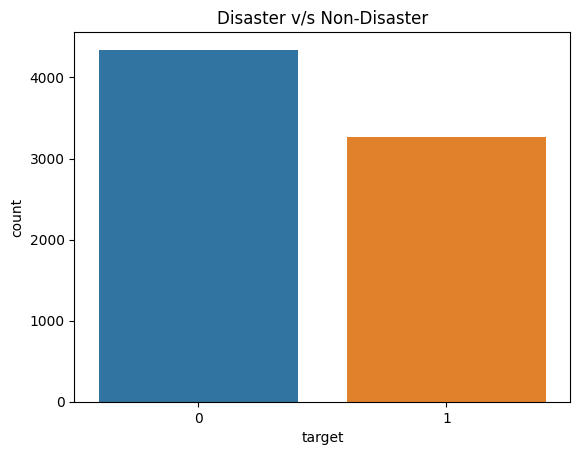

In [12]:
sns.countplot(x='target', data=train)
plt.title("Disaster v/s Non-Disaster")

In [13]:
for i in range(5):
  print("Tweet", [i])
  print(train['text'].iloc[i],"\n")
  print("Tweet: ",train['target'].iloc[i],"\n\n")

Tweet [0]
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 

Tweet:  1 


Tweet [1]
Forest fire near La Ronge Sask. Canada 

Tweet:  1 


Tweet [2]
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 

Tweet:  1 


Tweet [3]
13,000 people receive #wildfires evacuation orders in California  

Tweet:  1 


Tweet [4]
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  

Tweet:  1 




In [14]:
def no_of_words(text):
  words=text.split()
  word_count=len(words)
  return word_count

In [15]:
train['word count']=train['text'].apply(no_of_words)

In [16]:
train.head()

,keyword,text,target,word count
0,104,Our Deeds are the Reason of this #earthquake M...,1,13
1,104,Forest fire near La Ronge Sask. Canada,1,7
2,104,All residents asked to 'shelter in place' are ...,1,22
3,104,"13,000 people receive #wildfires evacuation or...",1,8
4,104,Just got sent this photo from Ruby #Alaska as ...,1,16


In [17]:
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def data_processing(text):
  text=text.lower()
  text=re.sub(r'[^\w\s]', '', text)
  text_tokens= word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [19]:
train.text=train['text'].apply(data_processing)

In [20]:
duplicated_count= train.duplicated().sum()
print("Number of duplicate entries", duplicated_count)

Number of duplicate entries 78


In [21]:
train=train.drop_duplicates('text')

In [22]:
train.shape

(7490, 4)

In [23]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word)for word in data]
  return data

In [24]:
train.text=train['text'].apply(lambda x: stemming(x))

In [25]:
train['word count']=train['text'].apply(no_of_words)

In [26]:
train.head()

,keyword,text,target,word count
0,104,deeds reason earthquake may allah forgive us,1,7
1,104,forest fire near la ronge sask canada,1,7
2,104,residents asked shelter place notified officer...,1,11
3,104,13000 people receive wildfires evacuation orde...,1,7
4,104,got sent photo ruby alaska smoke wildfires pou...,1,9


In [27]:
non_disaster=train[train.target==0]
non_disaster.head()

,keyword,text,target,word count
15,104,whats man,0,2
16,104,love fruits,0,2
17,104,summer lovely,0,2
18,104,car fast,0,2
19,104,goooooooaaaaaal,0,1


In [28]:
from collections import Counter
count= Counter()
for text in non_disaster['text'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('like', 250),
 ('im', 237),
 ('amp', 191),
 ('new', 168),
 ('get', 163),
 ('dont', 141),
 ('one', 126),
 ('body', 112),
 ('via', 98),
 ('would', 96),
 ('video', 95),
 ('got', 91),
 ('love', 89),
 ('people', 89),
 ('2', 86)]

In [29]:
disaster=train[train.target==1]
disaster.head()

,keyword,text,target,word count
0,104,deeds reason earthquake may allah forgive us,1,7
1,104,forest fire near la ronge sask canada,1,7
2,104,residents asked shelter place notified officer...,1,11
3,104,13000 people receive wildfires evacuation orde...,1,7
4,104,got sent photo ruby alaska smoke wildfires pou...,1,9


In [30]:
count=Counter()
for text in disaster['text'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('fire', 172),
 ('news', 135),
 ('via', 119),
 ('disaster', 112),
 ('california', 110),
 ('police', 106),
 ('amp', 105),
 ('suicide', 104),
 ('people', 102),
 ('killed', 93),
 ('like', 91),
 ('storm', 85),
 ('hiroshima', 85),
 ('crash', 84),
 ('fires', 83)]

In [31]:
x=train['text']
y=train['target']

In [32]:
vect=TfidfVectorizer()
x= vect.fit_transform(train['text'])

In [33]:
x_train,x_test, y_train, y_test= train_test_split(x,y ,test_size=0.2, random_state=42)

In [34]:
print("x train size: ",x_train.shape)
print("x test size: ",x_test.shape)
print("y train size: ",y_train.shape)
print("y test size:  ",y_test.shape)

x train size:  (5992, 22540)
x test size:  (1498, 22540)
y train size:  (5992,)
y test size:   (1498,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [36]:
log=LogisticRegression()
log.fit(x_train, y_train)
log_pred=log.predict(x_test)
log_acc=accuracy_score(log_pred, y_test)
print("Test accuracy :{:.2f}%".format(log_acc*100))

Test accuracy :79.97%


In [37]:
print(confusion_matrix(y_test, log_pred))
print("\n")
print(classification_report(y_test, log_pred))

[[802  75]
 [225 396]]


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       877
           1       0.84      0.64      0.73       621

    accuracy                           0.80      1498
   macro avg       0.81      0.78      0.78      1498
weighted avg       0.81      0.80      0.79      1498



In [38]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 80.24%


In [39]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[794  83]
 [213 408]]


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       877
           1       0.83      0.66      0.73       621

    accuracy                           0.80      1498
   macro avg       0.81      0.78      0.79      1498
weighted avg       0.81      0.80      0.80      1498



In [40]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 79.71%


In [41]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[762 115]
 [189 432]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       877
           1       0.79      0.70      0.74       621

    accuracy                           0.80      1498
   macro avg       0.80      0.78      0.79      1498
weighted avg       0.80      0.80      0.79      1498



In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.621 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.629 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.624 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.635 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.640 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.776 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.795 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.796 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.764 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.814 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.780 total time=   0.1s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [43]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.80
best parameters:  {'C': 1, 'loss': 'hinge'}


In [44]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

Test accuracy: 80.04%
[[785  92]
 [207 414]]


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       877
           1       0.82      0.67      0.73       621

    accuracy                           0.80      1498
   macro avg       0.80      0.78      0.79      1498
weighted avg       0.80      0.80      0.80      1498



In [45]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[785  92]
 [207 414]]


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       877
           1       0.82      0.67      0.73       621

    accuracy                           0.80      1498
   macro avg       0.80      0.78      0.79      1498
weighted avg       0.80      0.80      0.80      1498

